# Beam propagator

In [150]:
import numpy as np
import matplotlib.pyplot as plt

### Setup your beam

In [163]:
lambd = 1064e-9
w_o = 600e-6     #Beam waist size
z_o = w_o**2 *np.pi/lambd # intial rayleigh range
z = np.arange(-.501,1.001,.002) # total elapsed beam propogation
q_test = z + 1j*z_o

In [184]:
w =np.sqrt(q_test.imag*lambd/2*np.pi)*(1+(z/z_o)**2) 

r = [z[i]*(1+(z_o/z[i])**2) for i in range(0,len(z))]


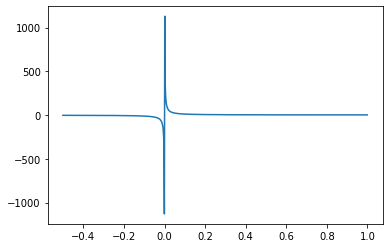

In [185]:
plt.plot(z,r)

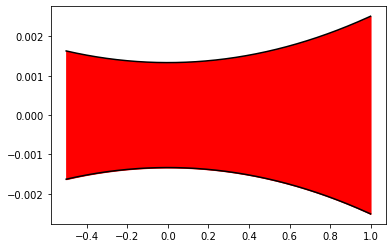

In [186]:
plt.plot(z,w,'k',z,-w,'k')
plt.fill_between(z, -w, w , color = 'red', alpha = 1)

### Propogate through ABCD

In [131]:
def thin_lens_mat(f): 
    return np.array([[1,0],[-1/f,1]])

def space_mat(d):
    return np.array([[1,d],[0,1]])

def final_q(q_1, fin_mat): 
    return (fin_mat[0,0]*q_1 + fin_mat[0,1])/(fin_mat[1,0]*q_1 + fin_mat[1,1])

def q_trans_phys(inv_q_1, wavlen): 
    w = np.sqrt(((-1.0/q_1.imag)*wavlen)/np.pi)
    r = 1/q_1.real
    return w , r

### Check waist size and position

In [120]:
q_i = 1j*z_o

In [121]:
vec_i = np.array([[q_i],[1]])
s_1 = space_mat(5.0e-2)
len_1 = thin_lens_mat(7.5e-2)
s_2 = space_mat(8.0e-2)
len_2 = thin_lens_mat(3.0e-2)
s_3 = space_mat(1e-2)


In [192]:
full_prop = [s_3,len_2, s_2, len_1, s_1]
mat_tot  = np.linalg.multi_dot(full_prop)
full_prop[][0,1]

0.01

In [204]:
full_prop_rev = full_prop[::-1]

In [197]:
current_mat = np.eye(2)
for i in range(0,len(full_prop)): 
    if full_prop[i][2,1]!=0:
        current_mat = np.linalg.multi_dot([full_prop_rev,current_mat])
        q_o = final_q(q_o,current_mat)
    if full_prop[i][1,2]!=0: 
        current_mat = 
        z_vect = 
        w = 

SyntaxError: invalid syntax (<ipython-input-197-cd46c9188b87>, line 7)

In [198]:
current_mat = np.eye(2)

In [123]:
q_f  = final_q(q_i, mat_tot)

In [135]:
1/q_f

(54.58105783789314-27.485384647671733j)

In [139]:
[w_f, r_f] = q_trans(1/q_f, lambd)

In [141]:
w_f

0.00011100562031500466

In [142]:
r_f

0.018321374477021323